<a href="https://colab.research.google.com/github/marvelsai/project-of-clustering-moons/blob/main/Saikiran_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [3]:
# check the dataset

data_

(array([[ 7.45264450e-01,  6.66769001e-01],
        [ 2.96920375e-01,  9.54902241e-01],
        [ 5.27728925e-01, -3.81453363e-01],
        [ 9.02926538e-01,  4.29794912e-01],
        [-1.58659638e-02,  9.99874128e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [ 7.16320670e-02,  1.28337544e-01],
        [ 2.01332353e-03,  4.36576080e-01],
        [-7.66044443e-01,  6.42787610e-01],
        [ 1.96794870e+00,  2.48852013e-01],
        [ 7.64241064e-01, -4.71811568e-01],
        [ 4.72271075e-01,  8.81453363e-01],
        [ 9.16108457e-01,  4.00930535e-01],
        [ 1.70147489e+00, -2.12694171e-01],
        [-7.23734038e-01,  6.90079011e-01],
        [ 1.26150623e-01,  1.38032639e-02],
        [ 9.59492974e-01,  2.81732557e-01],
        [-4.15415013e-01,  9.09631995e-01],
        [-9.99496542e-01,  3.17279335e-02],
        [ 5.55933387e-01, -3.95993774e-01],
        [ 1.26647381e+00, -4.63842159e-01],
        [ 6.05609687e-01,  7.95761841e-01],
        [ 1.07924996e+00, -4.968

In [4]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [5]:
inputData.head()

,0,1
0,0.745264,0.666769
1,0.296920,0.954902
2,0.527729,-0.381453
3,0.902927,0.429795
4,-0.015866,0.999874


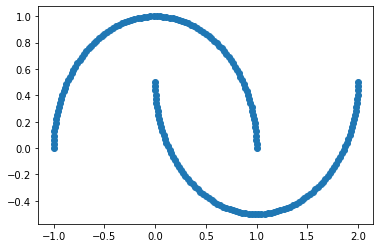

In [6]:
plt.scatter(inputData[0], inputData[1])

In [7]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,0
2,1
3,0
4,0


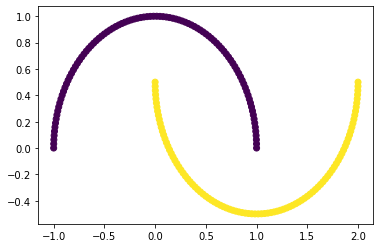

In [8]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c = outputData)

In [9]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# check for labels

model.labels_

array([4, 0, 3, 4, 0, 2, 3, 0, 2, 1, 3, 0, 4, 1, 2, 3, 4, 0, 2, 3, 1, 4,
       3, 1, 1, 0, 3, 3, 2, 0, 4, 1, 1, 1, 0, 2, 1, 4, 1, 0, 2, 3, 1, 0,
       2, 0, 4, 2, 0, 3, 1, 1, 0, 3, 4, 1, 0, 3, 1, 0, 4, 2, 2, 0, 3, 2,
       4, 0, 0, 1, 1, 1, 4, 2, 1, 3, 0, 1, 3, 3, 1, 3, 0, 2, 1, 1, 4, 2,
       3, 3, 4, 3, 0, 2, 2, 0, 0, 0, 4, 2, 0, 0, 3, 3, 3, 4, 4, 0, 1, 3,
       1, 0, 3, 2, 1, 1, 1, 4, 0, 2, 4, 3, 2, 1, 4, 2, 1, 3, 3, 3, 1, 4,
       3, 3, 2, 1, 3, 3, 1, 1, 0, 2, 1, 2, 4, 0, 3, 0, 0, 3, 2, 0, 2, 2,
       4, 4, 1, 0, 0, 4, 0, 1, 4, 1, 3, 1, 3, 1, 2, 0, 0, 1, 3, 4, 0, 4,
       2, 3, 3, 3, 1, 4, 0, 4, 3, 0, 0, 0, 3, 2, 4, 1, 0, 1, 2, 2, 2, 0,
       4, 1], dtype=int32)

In [11]:
from sklearn import metrics

In [12]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData, model.labels_)

0.4872097598491105

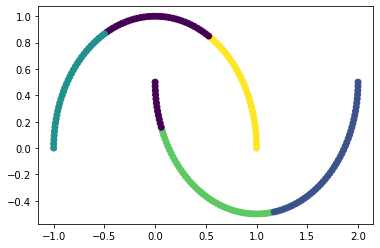

In [13]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [14]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

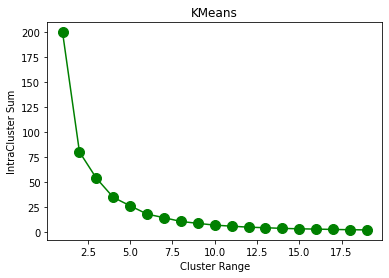

In [15]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()